<a href="https://colab.research.google.com/github/Seife1/PRODIGY_ML_02/blob/main/Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-means clustering algorithm - Group customers of a retail store**

**K-Means Clustering**: This popular technique divides data points into clusters according to how similar they are.  The process begins by selecting the number of clusters (k) to identify, Next, k points are randomly selected to serve as the initial centroids of the clusters. After that, each data point is matched with the closest centroid to create k clusters. The Within-Cluster Sum of Squares (WCSS) is used to evaluate the cluster quality, and the centroids are recalculated as the mean of all the points in each cluster. Until the centroids stabilise, signifying convergence, this iterative process is continued.

## **Data Overview**

The data is extracted and aggregated from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python. Each row in the data contains the values for Anual Income, Spending Score, Age, Gender, and Customers Id.

I will demonstrate customer segmentation concepts , also known as market basket analysis by using unsupervised ML technique (K-Means Clustering Algorithm) in the simplest form.

## **Imports and Load Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Warnning
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import zipfile

# # Define the path to your zip file
# file_path = '/content/drive/MyDrive/Colab Notebooks/ProdigyInfoTech/mall.zip'

# # Unzip the file to a specific destination
# with zipfile.ZipFile(file_path, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/ProdigyInfoTech')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ProdigyInfoTech/Mall_Customers.csv')

## **Explanatory Data Analysis**

In [5]:
df.shape

(200, 5)

In [6]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.describe().T # T is to transpose the table and make it easier to read

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
# Checking Null values for training set
df.isnull().sum()*100/df.shape[0]

,0
CustomerID,0.0
Gender,0.0
Age,0.0
Annual Income (k$),0.0
Spending Score (1-100),0.0


In [9]:
# Rename columns 'Annual Income (k$)' and 'Spending Score (1-100)'
df = df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'})

df

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


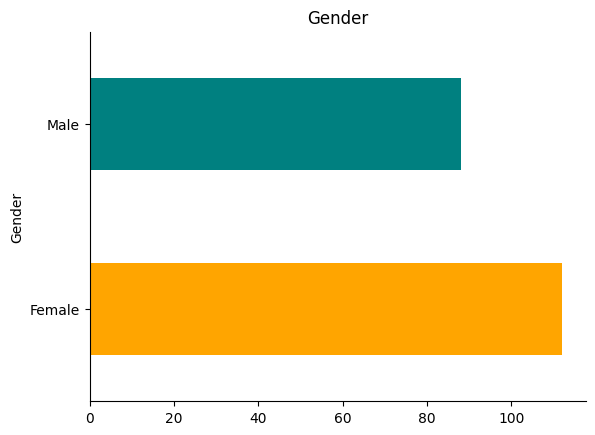

In [10]:
df.replace({0: 'Male', 1: 'Female'}).groupby('Gender').size().plot(
    kind='barh',
    title='Gender',
    color=['orange', 'teal']
)
plt.gca().spines[['top', 'right',]].set_visible(False)

There are more female customers than male customers.

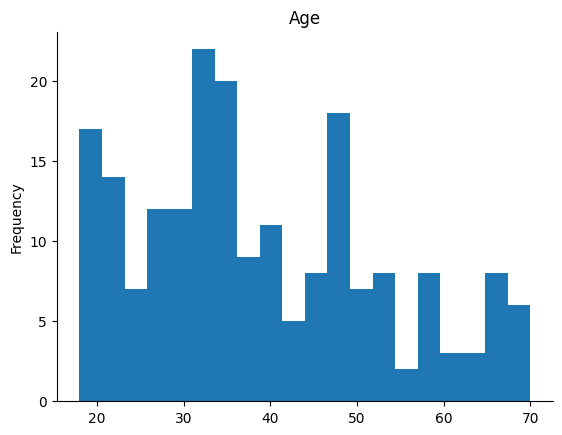

In [11]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

This histogram shows the distribution of customer ages. The age ranges from about 18 to 70 years. The highest frequency occurs around the 30-35 age range, suggesting that most customers fall within this age group. The frequency generally decreases as age increases, with some peaks around 20, 35, and 50.

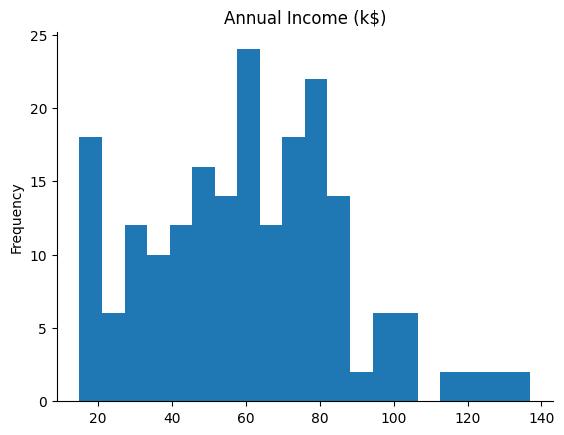

In [12]:
df['Income'].plot(kind='hist', bins=20, title='Annual Income (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

This histogram illustrates the distribution of annual income among customers. The income ranges from around $15,000$ to $140,000$. The highest frequency is in the $50,000$ to $60,000$ range, indicating that most customers earn between $50,000$ and $60,000$ annually.

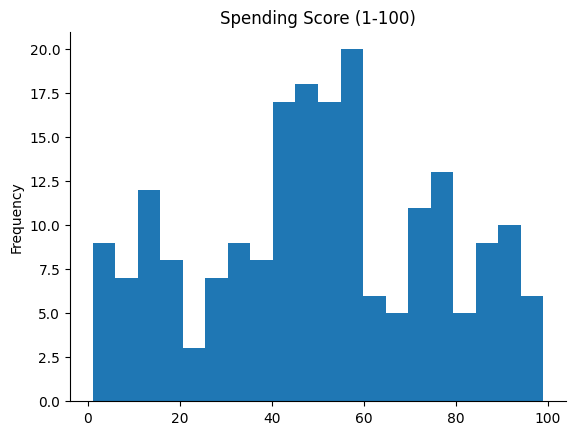

In [13]:
df['Score'].plot(kind='hist', bins=20, title='Spending Score (1-100)')
plt.gca().spines[['top', 'right',]].set_visible(False)

This histogram illustrates the distribution of spending scores among customers. Scores range from 0 to 100, with noticeable peaks around 40, 60, and 80, indicating clusters of customers with moderate to high spending behavior.

**Spending Score** is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

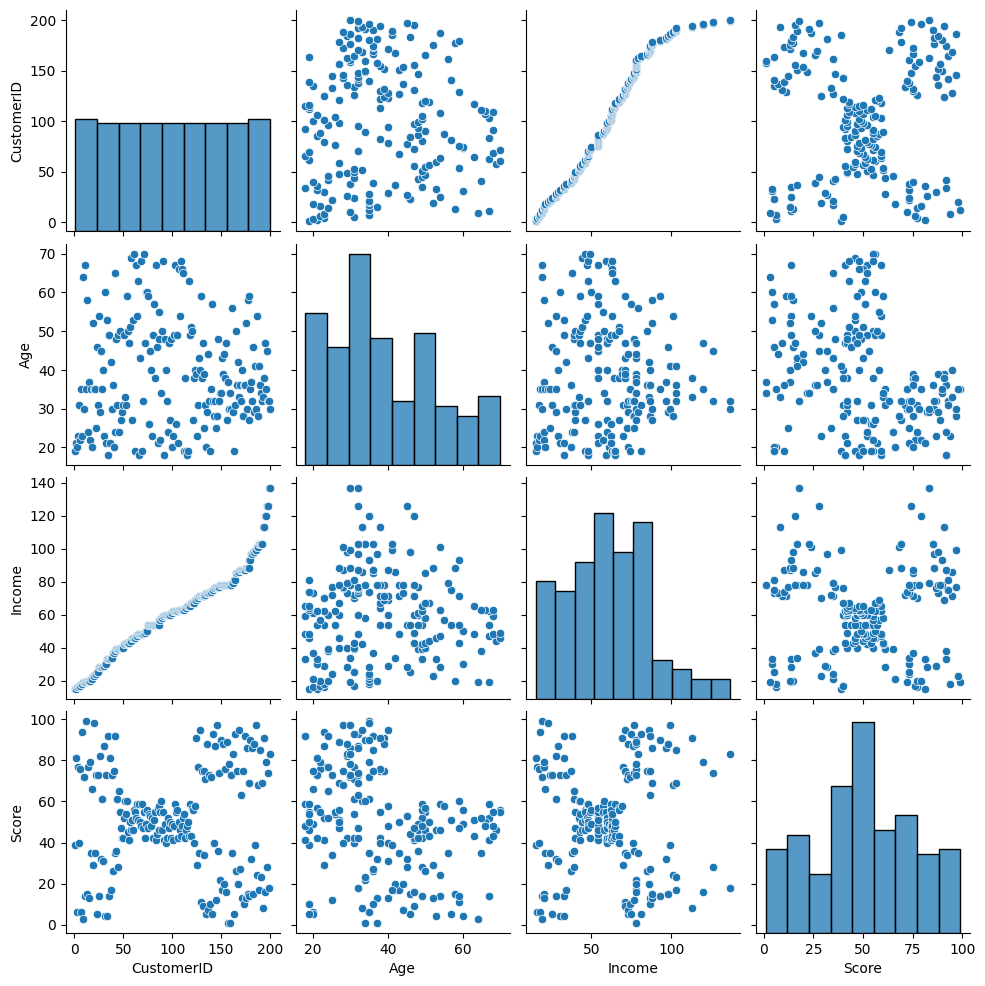

In [14]:
# Create a pair plot
sns.pairplot(df)
plt.show()

In [15]:
# Drop the 'CustomerID', 'Gender', and 'Age' columns from the dfFrame.
df = df.drop(['CustomerID','Gender','Age'], axis=1)
print(df.shape)
df

(200, 2)


,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


This scatter plot depicts the relationship between age and annual income. Customers' ages range from 20 to 70, with incomes spanning from $20,000$ to $140,000$. There is no clear correlation, as income is distributed across all age groups.

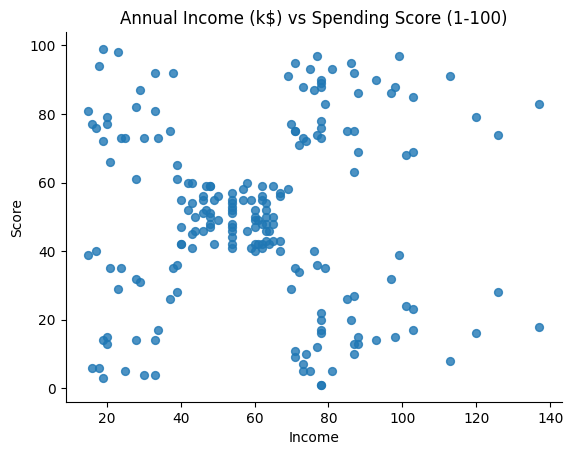

In [16]:
df.plot(kind='scatter', x='Income', y='Score',title='Annual Income (k$) vs Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

This scatter plot shows the relationship between annual income and spending score. Incomes range from $20,000$ to $140,000$, with spending scores between 0 and 100. The data reveals distinct clusters, particularly around $60,000 income with moderate spending scores, and a lack of strong correlation between income and spending.

## **K-Means Clustering with the Elbow method**
### **Determining the Number of Clusters (K):**

We can use the **Elbow method** to have an indication of clusters for our data. It consists in the interpretation of a line plot with an elbow shape. The number of clusters is where the $elbow$ $bends$. The x axis of the plot is the number of clusters and the y axis is the Within Clusters Sum of Squares (WCSS) for each number of clusters.

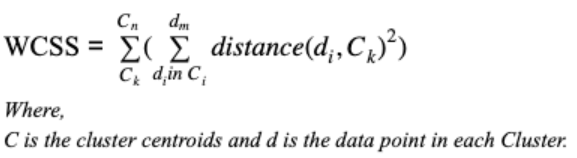

The basic idea behind k-means clustering is defining clusters so that the within-cluster variation is minimized.

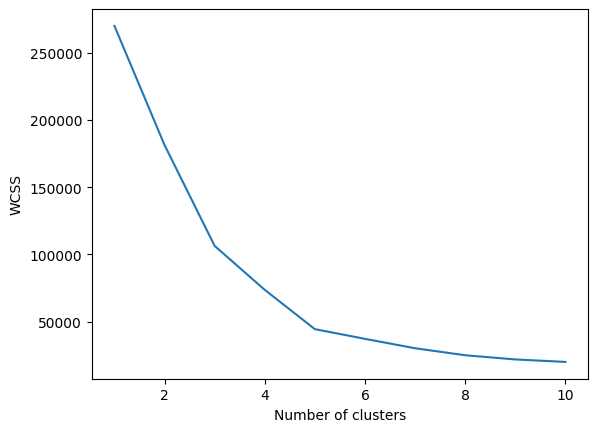

In [17]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df[['Income', 'Score']])
    wcss.append(clustering.inertia_)

ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method indicates our data has $5$ clusters. Let's plot the data before and after clustering:

In [18]:
x=np.array(df.values)

Model = KMeans(n_clusters=5,n_init='auto',init='k-means++')
Model.fit(x)
y_pred = Model.predict(x)

centers = Model.cluster_centers_
error = Model.inertia_
lables = set(Model.labels_)


print('Centers : ',centers)
print()
print('Cost : ',error)
print()
print('Labels : ',lables)

Centers :  [[55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [87.75       17.58333333]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]

Cost :  44454.47647967972

Labels :  {0, 1, 2, 3, 4}


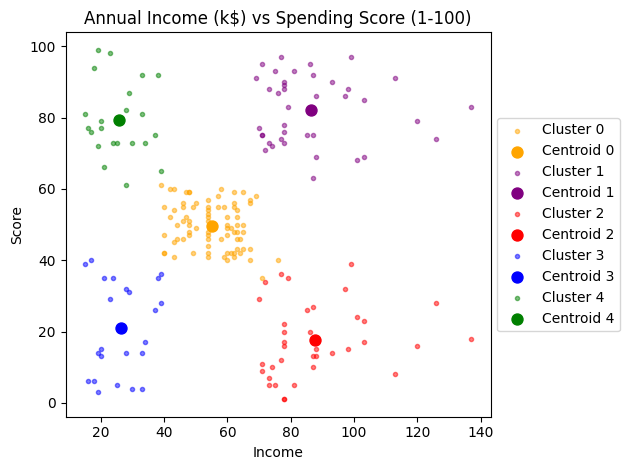

In [19]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1], color='orange',alpha=0.5,label='Cluster 0',marker='.')
plt.scatter(centers[0,0],centers[0,1],color='orange',s=250,marker='.',label='Centroid 0')

plt.scatter(x[y_pred==1,0],x[y_pred==1,1], color='purple',alpha=0.5,label='Cluster 1',marker='.')
plt.scatter(centers[1,0],centers[1,1],color='purple',s=250,marker='.',label='Centroid 1')

plt.scatter(x[y_pred==2,0],x[y_pred==2,1], color='red',alpha=0.5,label='Cluster 2',marker='.')
plt.scatter(centers[2,0],centers[2,1],color='red',s=250,marker='.',label='Centroid 2')

plt.scatter(x[y_pred==3,0],x[y_pred==3,1], color='blue',alpha=0.5,label='Cluster 3',marker='.')
plt.scatter(centers[3,0],centers[3,1],color='blue',s=250,marker='.',label='Centroid 3')

plt.scatter(x[y_pred==4,0],x[y_pred==4,1], color='green',alpha=0.5,label='Cluster 4',marker='.')
plt.scatter(centers[4,0],centers[4,1],color='green',s=250,marker='.',label='Centroid 4')


plt.xlabel('Income')
plt.ylabel('Score')
plt.title('Annual Income (k$) vs Spending Score (1-100)')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
plt.show()

The K-means clustering algorithm has effectively segmented the retail store's customers into five distinct groups based on their annual income and spending scores. This segmentation reveals valuable patterns in consumer behavior, providing actionable insights for targeted marketing.

Each cluster is represented by different colors, with the centroids marked distinctly. The clustering reveals patterns in consumer behavior:

* **Cluster 0 (yellow)** consists of customers with mid-level income and moderate spending scores.
* **Cluster 1 (purple)** includes customers with high income but moderate spending scores, indicating a more conservative spending habit.
* **Cluster 2 (red)** comprises customers with high income but low spending scores, likely indicating a group that is wealthy but frugal.
* **Cluster 3 (green)** contains customers with moderate income and higher spending scores, possibly reflecting a more budget-conscious yet engaged consumer group.
* **Cluster 4 (blue)** features customers with low income but higher spending scores, suggesting that these customers spend a significant portion of their income.

The centroids of each cluster serve as the central point representing the average behavior within each group. This segmentation can be valuable for targeted marketing strategies, allowing businesses to tailor their approach to different customer groups based on income and spending behavior.

Finally, given the insights from the K-means clustering algorithm, the retail store could consider developing personalized marketing strategies tailored to each customer segment. For example, customers in Cluster 4 (low income, high spending) might respond well to loyalty programs or discounts, while those in Cluster 2 (high income, low spending) might be enticed with premium product offerings or exclusive services. Additionally, the store could explore upselling or cross-selling strategies for Cluster 0 customers (mid-income, moderate spending) to increase their spending.